In [1674]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Ml Modeling 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

# Visualisation 
import seaborn as sns 
import matplotlib.pyplot as plt
import shap
import altair

# NLP 
import spacy

In [1675]:
SourceData=pd.read_excel('Data_Train.xlsx')
SourceData.head(5)

TestData=pd.read_excel('Data_Test.xlsx')
TestData.head(5)


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


# Story 

In [1707]:
'''
In our own Mini Hackathon saga ( Our very own kaggle battleground)  , I waded into the maze of book data—editions, authors, and synopses. 
I started with a basic model, no fancy settings (for out of box score). 

post that I Weaving more features from this bookish mix, I tinkered with a few techniques to get me a better rank (and some respect in community ;). 

With a target score (1-sqrt(mean_squared_log_error)) and dreams of 90+, I proceeded cautiously, using cross-validation to avoid any sneaky overfitting. 
This hackathon tale, a blend of coding and chaos, unfolded over a few days of quirky problem-solving.

Hiding my secret "thetrics" for the big reveal on the last slide - what would be my rank if I enter the competition ?

'''


'\nIn our own Mini Hackathon saga ( Our very own kaggle battleground)  , I waded into the maze of book data—editions, authors, and synopses. \nI started with a basic model, no fancy settings (for out of box score). \n\npost that I Weaving more features from this bookish mix, I tinkered with a few techniques to get me a better rank (and some respect in community ;). \n\nWith a target score (1-sqrt(mean_squared_log_error)) and dreams of 90+, I proceeded cautiously, using cross-validation to avoid any sneaky overfitting. \nThis hackathon tale, a blend of coding and chaos, unfolded over a few days of quirky problem-solving.\n\nHiding my secret "thetrics" for the big reveal on the last slide - what would be my rank if I enter the competition ?\n\n'

# Functions Created 

In [2199]:

# Creating Multiple Basic ML Models (No Parameters yet )

def Create_ScatterPlot(data, x, y, z=None, size=(7, 5)):
    plt.figure(figsize=size)
    
    # Define a custom color palette with yellow and orangish colors
    custom_palette = ['#e0ac00','#d8b600' , '#e69f00', '#d08400', '#995300']
    beautiful_palette = sns.color_palette("YlOrRd", n_colors=5)

    
    if z is not None:
        hue_order = sorted(data[z].unique()) 
        ax=sns.scatterplot(x=data[x], y=data[y], hue=data[z], palette=custom_palette, hue_order=hue_order, data=data, s=50)
        sns.despine()
        # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=z)
        # ax.legend(bbox_to_anchor=(1, 0.5), title=z)
        plt.title(f'{x} , {y} and {z} Plot', fontsize=8 + 2, fontweight='bold')
    else:
        ax=sns.scatterplot(x=data[x], y=data[y], color='#d08400', data=data, s=50)
        sns.despine()
        plt.title(f'{x} and {y} Plot', fontsize=8 + 2, fontweight='bold')

    plt.xlabel(x, fontsize=8, fontweight='bold')
    plt.ylabel(y, fontsize=8, fontweight='bold')
    plt.tick_params(axis='both', labelsize=8)
    plt.grid(False)  # Remove grid lines
    # Remove the background
    

     # Make y-axis tick labels bold
    for tick_label in ax.yaxis.get_majorticklabels():
        tick_label.set_fontweight('bold')
    
    if z is not None:
        legend = ax.get_legend()
        title = legend.get_title()
        title.set_fontsize(8)
        title.get_fontweight=200

     # Add a little padding for better aesthetics
    plt.tight_layout()
    plt.show()



def CreateML_Model(data,Targets,FeatureList,WhichModel='All'):

  X=data[FeatureList]
  Y=data[Targets].astype(int)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  if WhichModel=='All':
  # Spot check algorithms
    models = []
    models.append(('Lasso', Lasso()))
    models.append(('ElasticNet', ElasticNet()))
    models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
    models.append(('KNeighborsRegressor', KNeighborsRegressor()))
    models.append(('RandomForestRegressor', RandomForestRegressor( n_estimators=200,
                                                                    criterion='squared_error')))
    models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
    models.append(('LinearRegression', LinearRegression()))
                
  # Evaluate each model mae and r2 
  results = []
  names = []
  mymodels={}
  print('ModelName: MeanAbsoluteError, RSquare ,AdjRSquare')
  for name, model in models:
    model.fit(X_train, y_train)
    mymodels[name]=model
    predictions = model.predict(X_test)
    cv_results_r2= r2_score(y_test, predictions)
    # Calculate adjusted R-squared
    n = len(y_test)
    k = X_test.shape[1]
    adjusted_r_squared = 1 - (1 - cv_results_r2) * (n - 1) / (n - k - 1)
    # Calculate adjusted R-squared
    cv_results = mean_absolute_error(y_test, predictions)
    results.append(cv_results)
    names.append(name)
    msg = '%s : %f ,%f ,%f'% (name, cv_results,cv_results_r2,adjusted_r_squared)
    
    print(msg)

  return mymodels,X_test,y_test


# Plottiong feature Importance 

def PlotFeatureImporance(model,Title):

    if 'LinearRegression()' in str(model):
    #if 'DontVisitTheloop' in str(model):
        feature_importance = model.coef_  
    else:
        feature_importance =  model.feature_importances_
        feature_names =FeatureList

    df_feature_importance = pd.DataFrame({'Feature': FeatureList, 'Importance': feature_importance})
    # Plot the data 
        
    chartDtree = alt.Chart(df_feature_importance).mark_bar().encode(
        x=alt.X('Importance'),
        y=alt.Y('Feature', sort='-x',axis=alt.Axis(labelLimit=800)),
        # color=alt.Color('Importance', scale=alt.Scale(color=custom_colors)),
        color=alt.value('#ffd966'),
        tooltip=['Feature','Importance']
    ).properties(
        title=Title,
        width=500,
        height=500)
    chartDtree = chartDtree.configure_axisY(
        title=None  # Set title to None to hide the y-axis label
    ).configure_mark(
        strokeWidth=0.3,  # Set the width of the border
        stroke='black'  # Set the color of the border
    )
    return chartDtree

def plot_correlation_matrix(data, size=(8, 6), cmap='YlOrRd'):
    correlation_matrix = data.corr()
    
    # Create a seaborn heatmap with dynamic sizing and yellowish color
    plt.figure(figsize=size)
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
    
    plt.title('Correlation Plot')
    plt.show()

def plot_correlation_matrix_threshhold(data, size=(8, 6), cmap='YlOrRd', threshold=0.40):
    correlation_matrix = data.corr()
    
    # Filter the correlation matrix based on the threshold
    high_correlation_matrix = correlation_matrix[abs(correlation_matrix) > threshold]
    
    # Create a seaborn heatmap with dynamic sizing and yellowish color
    plt.figure(figsize=size)
    sns.heatmap(high_correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
    
    plt.title('Correlation Plot (Coef > 0.40)')
    plt.show()

def OutLierHandling(data,column):
    # Assuming 'data' is your DataFrame and 'column' is the column with outliers

    # Calculate Q1 and Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define Lower and Upper Bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify Outliers
    lower_outliers = data[column] < lower_bound
    upper_outliers = data[column] > upper_bound
    # Replace Lower Outliers with Lower Bound
    data.loc[lower_outliers, column] = lower_bound
    # Replace Upper Outliers with Upper Bound
    data.loc[upper_outliers, column] = upper_bound

    return data 

def CorrAttributesList(data,Target,ThreshHold):
    EDA_df=data 
    correlation_values_P= EDA_df.corr()[Target]
    correlation_values_S= EDA_df.corr(method='spearman')[Target]
    EDA_concatenated_Correlation_df = pd.concat([correlation_values_P, correlation_values_S], axis=1,keys=['Pearson', 'Spearman'])

    for i in EDA_concatenated_Correlation_df.columns :
        j='Abs'+i
        EDA_concatenated_Correlation_df[j]=abs(EDA_concatenated_Correlation_df[i])
    Selected = EDA_concatenated_Correlation_df[(EDA_concatenated_Correlation_df["AbsPearson"]>ThreshHold) 
                                           | (EDA_concatenated_Correlation_df["AbsSpearman"]>ThreshHold)] 
                                  
    Selected_list=Selected.index

    return Selected_list,Selected

def remove_highly_correlated_features(df, threshold):
    corr_matrix = df.corr().abs()  # Calculate the correlation matrix
    upper = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))    
    # Find columns to drop
    drop_cols = [column for column in upper.columns if any(upper[column] > threshold)]
    print(drop_cols)
    # Remove highly correlated features
    df_filtered = df.drop(columns=drop_cols)
    return df_filtered

def CustomPlots(data,plot='hist'):
    colslist=data.columns.to_list()
    # row=math.floor(len(colslist)/4)+1

    if plot=='hist':
        col=4
        row=len(colslist)//col  + math.ceil((len(colslist)%col)/col)
        fig,ax=plt.subplots(nrows=row, ncols=col,figsize=(15,row*(col*0.75)))
        axes = ax.flatten()
        for prog, ax in zip(colslist, axes):
            ax = sns.histplot(data[prog], kde=True, color='#d8b600',ax=ax)

               
    elif plot=='box':
        col=4
        row=len(colslist)//col  + math.ceil((len(colslist)%col)/col)
        fig,ax=plt.subplots(nrows=row, ncols=col,figsize=(12,row*(col*0.75)))
        axes = ax.flatten()
        for prog, ax in zip(colslist, axes):
            ax = sns.boxplot(data[prog], color='#d8b600',ax=ax).set(xlabel=prog)
    

    plt.tight_layout()


def rmsle(y_actual, y_predicted):
    # Calculate the squared differences between log-transformed values
    log_diff = np.log1p(y_predicted) - np.log1p(y_actual)
    squared_log_diff = np.square(log_diff)
    
    # Calculate the mean of the squared log differences
    mean_squared_log_diff = np.mean(squared_log_diff)
    
    # Calculate the square root to get the RMSLE
    rmsle_score = np.sqrt(mean_squared_log_diff)
    
    return rmsle_score



# NLP Functions

In [1678]:
# NLP Functions 

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

def get_bestseller_score(synopsis):
    # Perform sentiment analysis on the synopsis

    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(synopsis)['compound']
    # Map sentiment score to a scale of 1-100
    bestseller_score = int((sentiment_score + 1) * 50)

    return bestseller_score

def is_thriller_mystery(synopsis):
    # Check if the synopsis contains keywords related to thriller/mystery
    keywords = ['thriller', 'mystery', 'suspense', 'detective']
    tokens = word_tokenize(synopsis.lower())
    return any(keyword in tokens for keyword in keywords)

def is_historic(synopsis):
    # Check if the synopsis mentions historical events or settings
    historic_keywords = ['historic', 'historical', 'period piece']
    tokens = word_tokenize(synopsis.lower())
    return any(keyword in tokens for keyword in historic_keywords)

def is_part_of_series(synopsis):
    # Check if the synopsis indicates that the book is part of a series
    series_keywords = ['book', 'part', 'series','sequence','part2']
    tokens = word_tokenize(synopsis.lower())
    return all(keyword in tokens for keyword in series_keywords)


def includes_pictures(synopsis):
    # Check if the synopsis mentions visual content, images, or photography
    visual_keywords = ['pictures', 'images', 'photography', 'photos']
    tokens = word_tokenize(synopsis.lower())
    return any(keyword in tokens for keyword in visual_keywords)

def is_biography(synopsis):
    # Check if the synopsis indicates that the book is a biography or autobiography
    biography_keywords = ['autobiography', 'life story', 'memoir']
    tokens = word_tokenize(synopsis.lower())
    return any(keyword in tokens for keyword in biography_keywords)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rohit.jishtu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohit.jishtu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rohit.jishtu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Step 1 : Grain Check and Stats for All Source Data Columns

In [1679]:
# Conform the grain of the source Data , Keeping only 1 book per author , there are a few duplicates 
SourceData.drop_duplicates((['Title','Author']),keep='first',inplace=True)

In [1680]:
NumericAttributes = CalBasicStats(SourceData,'numeric')
Non_NumericAttributes = CalBasicStats(SourceData,'Nonnumeric')
print(NumericAttributes)
print(Non_NumericAttributes)

  ColumnName  AllCounts  NotNullCounts  UniqueCounts  %Zero  %Missing   Min  \
0      Price       5581           5581          1564    0.0       0.0  25.0   

       Max        Mean     Average  Median    StddDev            Var  \
0  14100.0  564.074066  564.074066   374.0  701.55732  492182.673481   

   Skewness   Kurtosis  25Percentile  50Percentile  75Percentile  
0  6.895845  83.148245         249.0         374.0         601.0  
     ColumnName  AllCounts  NotNullCounts  UniqueCounts  %Missing
0         Title       5581           5581          5568       0.0
0        Author       5581           5581          3679       0.0
0       Edition       5581           5581          3364       0.0
0       Reviews       5581           5581            36       0.0
0       Ratings       5581           5581           324       0.0
0      Synopsis       5581           5581          5523       0.0
0         Genre       5581           5581           345       0.0
0  BookCategory       5581        

# Step 2 : Data & Target Identification and Distribution

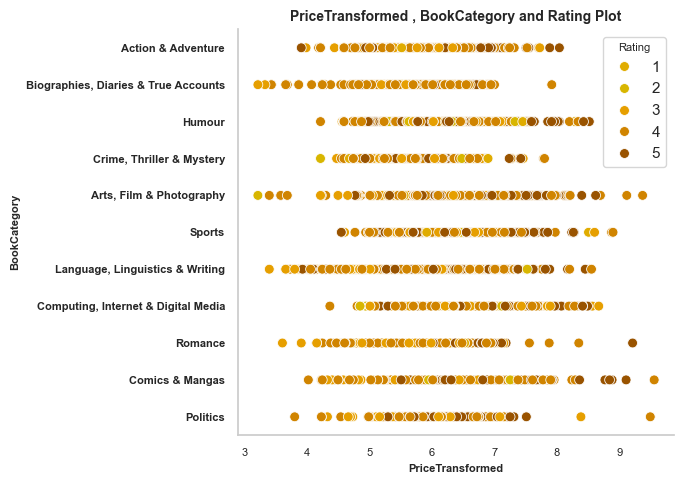

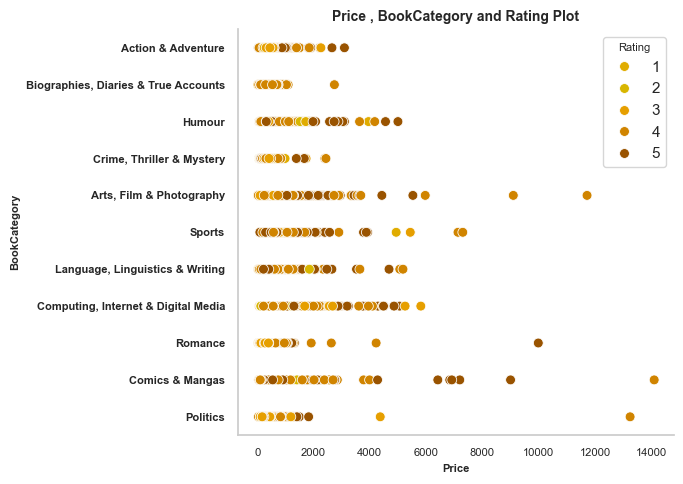

In [1729]:
# plt.hist(SourceData['Price'])
original_variable = np.exp(np.log(SourceData['Price']))
SourceData['PriceTransformed']=np.log(SourceData['Price'])


x='PriceTransformed'
y='BookCategory'
SourceData['Rating']=SourceData['Reviews'].str[:1]
z='Rating'
Create_ScatterPlot(SourceData,x,y,z)

# SourceData['PriceTransformedBack']= np.exp(SourceData['PriceTransformed'])
x='Price'

Create_ScatterPlot(SourceData,x,y,z)

# Step 3 : I am feeling Lucky - Baseline Model Building -[Preprocessing , Modeling & Results]

In [1682]:
# Step1 : Preprocessing before modeling 

# All Columns are as  'Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'BookCategory', 'Price']

Modelready_df=SourceData.copy()

# 1. Removing Descriptive and ID related attributes 

NoUseColumns=['Title','Author','Synopsis','Edition','Rating','PriceTransformed']


# 2. Modelready_df['Genre'].nunique() #345 [Genre has 345 Types , No ideal for baseline]


NoUseColumns.append('Genre')

# 3. Cleaning 
# 'Edition', 'Reviews', 'Ratings' columns to gather more generic groups 

Modelready_df['_Reviews'] = Modelready_df['Reviews'].str[:1]
Modelready_df['_Ratings'] = Modelready_df['Ratings'].str[:2].str.replace(',', '')

Modelready_df['_Reviews'].astype(int)
Modelready_df['_Ratings'].astype(int)

NoUseColumns.append('Reviews')
NoUseColumns.append('Ratings')
# Modelready_df
# print(NoUseColumns)


Modelready_df

# 4. Categorical conversion of  BookCategory

one_hot_encoded = pd.get_dummies(Modelready_df['BookCategory'], prefix='BookCategory_')
Modelready_df=pd.concat([Modelready_df,one_hot_encoded],axis=1)
NoUseColumns.append('BookCategory')

# 5. Drop All Columns Not Required 
Modelready_df= Modelready_df.drop(columns=NoUseColumns)

Modelready_df.head(5)


,Price,_Reviews,_Ratings,BookCategory__Action & Adventure,"BookCategory__Arts, Film & Photography","BookCategory__Biographies, Diaries & True Accounts",BookCategory__Comics & Mangas,"BookCategory__Computing, Internet & Digital Media","BookCategory__Crime, Thriller & Mystery",BookCategory__Humour,"BookCategory__Language, Linguistics & Writing",BookCategory__Politics,BookCategory__Romance,BookCategory__Sports
0,220.00,4,8,1,0,0,0,0,0,0,0,0,0,0
1,202.93,3,14,0,0,1,0,0,0,0,0,0,0,0
2,299.00,4,6,0,0,0,0,0,0,1,0,0,0,0
3,180.00,4,13,0,0,0,0,0,1,0,0,0,0,0
4,965.62,5,1,0,1,0,0,0,0,0,0,0,0,0


In [1683]:
# Step2 : Modeling
Targets=['Price']
FeatureList= [x for x in Modelready_df.columns if x not in Targets]
models,test_data,test_target = CreateML_Model(Modelready_df,Targets[0],FeatureList)

# Feature Importance based on the Models 
Title='Baseline Modeling - RandomForestRegressor'
Model=models['RandomForestRegressor']
PlotFeatureImporance(Model,Title)


ModelName: MeanAbsoluteError, RSquare ,AdjRSquare
Lasso : 311.765208 ,0.136945 ,0.126773
ElasticNet : 333.536747 ,0.071401 ,0.060456
DecisionTreeRegressor : 353.628186 ,-0.158174 ,-0.171824
KNeighborsRegressor : 326.042435 ,-0.044343 ,-0.056651
RandomForestRegressor : 338.560300 ,-0.046838 ,-0.059176
ExtraTreesRegressor : 346.961352 ,-0.093295 ,-0.106180
LinearRegression : 312.448152 ,0.135454 ,0.125265


alt.Chart(...)

# V1 : Kaggle Score and Rank

In [1684]:
Model.fit(test_data, test_target)
actual = test_target
predicted = Model.predict(test_data)

# Rank 6 (Score: 0.791311))
# Example usage:
# Assuming 'y_actual' is your actual target values and 'y_predicted' is your model's predicted values


# actual_real=np.exp(actual)
# predicted_real=np.exp(predicted)

rmsle_error = rmsle(actual, predicted)

Score = 1 - rmsle_error
print(f'RMSLE Error: {rmsle_error}')
print(f'Kaggle Score: {Score}')

# from math import sqrt
# from sklearn.metrics import mean_squared_log_error
# print('RMSLE V2:', sqrt(mean_squared_log_error(actual, predicted)))

RMSLE Error: 0.5570458875479469
Kaggle Score: 0.4429541124520531


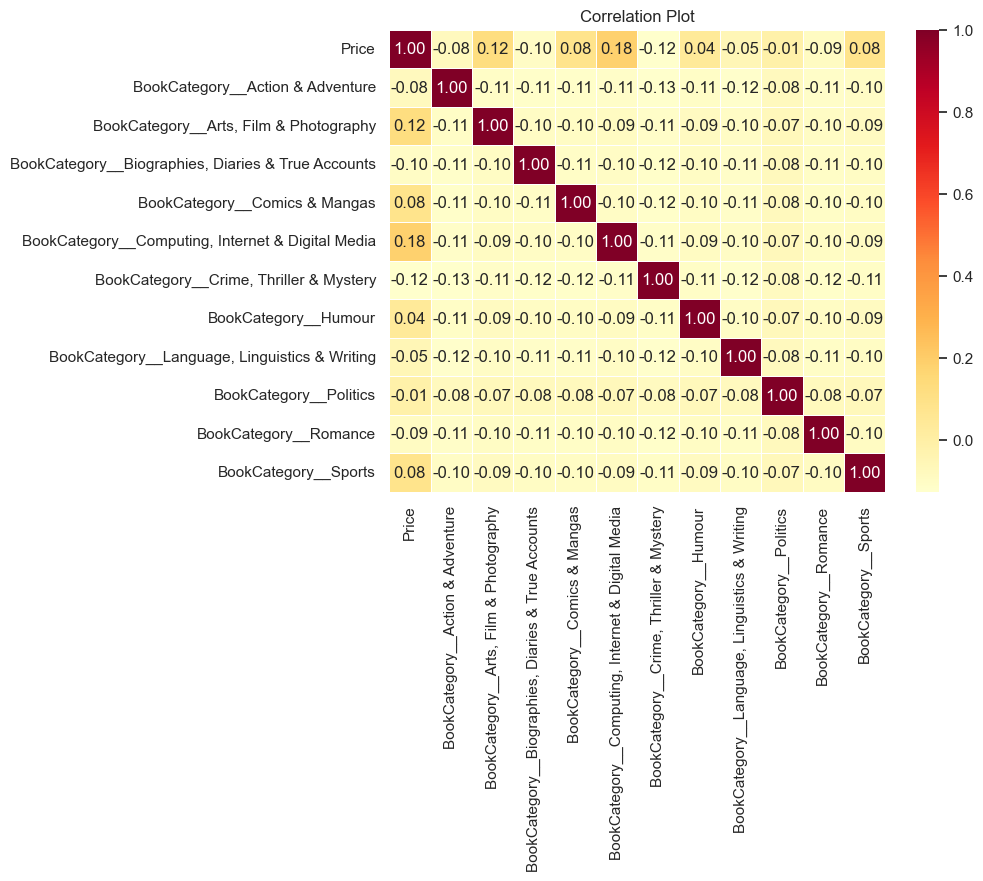

In [1685]:
plot_correlation_matrix(Modelready_df)

# Step 4 : Feature Engineering

In [2048]:
# Step 4 : Features Creation 

Modelready_df_v2 =SourceData.copy()
# making review and Ratinga s Numeric features 

Modelready_df_v2['_NoOfReviews'] = Modelready_df_v2['Ratings'].str[:2].str.replace(',', '').astype(int)
# Reviews 
Modelready_df_v2['Rating_Outof5'] = Modelready_df_v2['Reviews'].str[:1]
Modelready_df_v2['Rating_Outof5'].astype(int)
Modelready_df_v2['index']=Modelready_df_v2.index


#------------------------------------------------------------------------------------------#
# Features Based on BookCategory and Author  
#------------------------------------------------------------------------------------------#

# Author Level 
group1_AuthorPrice = Modelready_df_v2.groupby(['Author'])['_NoOfReviews'].agg(['min','mean','max']).reset_index()
group1_AuthorPrice.columns = ['Author', 'Author_Min_OnlineReviews', 'Author_Avg_OnlineReviews','Author_max_OnlineReviews']

# Category Level 

group2_CategoryPrice = Modelready_df_v2.groupby(['BookCategory'])['Price'].agg(['min', 'mean','max']).reset_index()
group2_CategoryPrice.columns = ['BookCategory', 'BookCategory_Min_Price', 'BookCategory_Avg_Price','BookCategory_max_Price']

one_hot_encoded = pd.get_dummies(Modelready_df_v2['BookCategory'], prefix='BookCategory')
Modelready_df_v2=pd.concat([Modelready_df_v2,one_hot_encoded],axis=1)


#------------------------------------------------------------------------------------------#
# Features Based on Rating and Author  
#------------------------------------------------------------------------------------------#

# Binning the rating 

percentiles = [0, 33, 66, 100]
bin_edges = np.percentile(Modelready_df_v2['_NoOfReviews'], percentiles)
# Create bins dynamically
Modelready_df_v2['Rating_bin'] = pd.cut(Modelready_df_v2['_NoOfReviews'], bins=bin_edges, labels=['Low', 'Medium', 'High'])
# # Display the resulting DataFrame
Modelready_df_v2['Rating_bin'].fillna('Low')


one_hot_encoded = pd.get_dummies(Modelready_df_v2['Rating_bin'], prefix='', prefix_sep='').add_suffix('_NoOfPeopleRated')
Modelready_df_v2=pd.concat([Modelready_df_v2,one_hot_encoded],axis=1)


Modelready_df_v2['Rating_bin']=Modelready_df_v2['Rating_bin'].apply(lambda x: 1 if x=='' else x)


#------------------------------------------------------------------------------------------#
# Features Based on Book Binding and year  
#------------------------------------------------------------------------------------------#

Modelready_df_v2['CoverType'] = Modelready_df_v2['Edition'].str.split(',').str[0].str.strip()
Modelready_df_v2['CoverType'] = Modelready_df_v2['CoverType'].apply(lambda x: 'Paperback' if 'Hardcover' not in x else 'Hardcover')

one_hot_encoded = pd.get_dummies(Modelready_df_v2['CoverType'], prefix='CoverType')
Modelready_df_v2=pd.concat([Modelready_df_v2,one_hot_encoded],axis=1)


#------------------------------------------------------------------------------------------#
# Avg Price for category , with Edition Year 
#------------------------------------------------------------------------------------------#

Modelready_df_v2['Year'] = Modelready_df_v2['Edition'].str[-4:]
Modelready_df_v2['Year']
Modelready_df_v2['Year'] = pd.to_numeric(Modelready_df_v2['Year'], errors='coerce')
Modelready_df_v2['Year'] = Modelready_df_v2['Year'].apply(lambda x: None if pd.isna(x) else int(x))


group3_Year_CategoryPrice = Modelready_df_v2.groupby(['BookCategory','Year'])['Price'].mean().reset_index()
group3_Year_CategoryPrice.columns = ['BookCategory', 'Year','Year_Category_AveragePrice']



In [2062]:
#------------------------------------------------------------------------------------------#
# Avg Price for category , with Edition Decade of Books  
#------------------------------------------------------------------------------------------#

start_year = 1981
end_year = 2020
bin_size = 5
year_bins = [start_year + i for i in range(0, (end_year - start_year) + bin_size + 1, bin_size)]

# Create a new column 'year_bucket' based on the 'Year' column
# Create a new column 'year_bucket' based on the 'Year' column
Modelready_df_v2['year_bucket'] = pd.cut(Modelready_df_v2['Year'], bins=year_bins, labels=[f"{i}-{i+bin_size-1}" for i in range(start_year, end_year, bin_size)])


group3_5Year_CategoryPrice= Modelready_df_v2.groupby(['BookCategory','year_bucket'])['Price'].mean().reset_index()
group3_5Year_CategoryPrice.columns = ['BookCategory', 'year_bucket','5Year_Category_AveragePrice']

group3_5Year_CategoryPrice

,BookCategory,year_bucket,5Year_Category_AveragePrice
0,Action & Adventure,1981-1985,346.750000
1,Action & Adventure,1986-1990,256.395000
2,Action & Adventure,1991-1995,360.780455
3,Action & Adventure,1996-2000,383.106154
4,Action & Adventure,2001-2005,354.550851
...,...,...,...
83,Sports,1996-2000,827.828571
84,Sports,2001-2005,742.667200
85,Sports,2006-2010,934.262346
86,Sports,2011-2015,748.454854


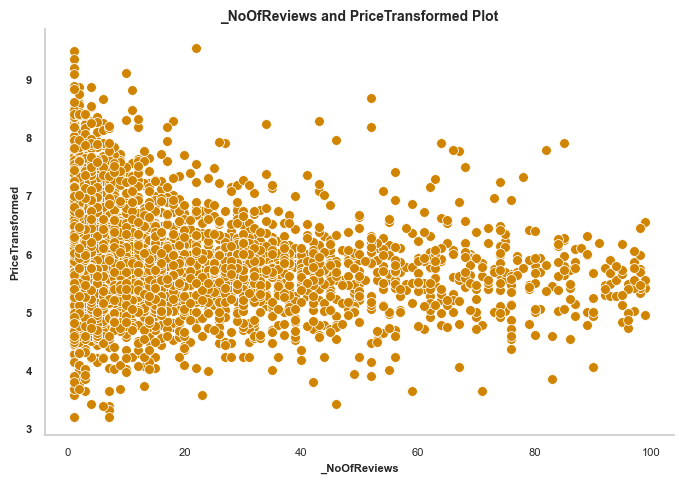

In [2200]:

Create_ScatterPlot(Modelready_df_v2,'_NoOfReviews','PriceTransformed')

In [2193]:
SourceData['Synopsis'][21]

"FROM THE BESTSELLING AUTHOR OF RONALDO AND NEYMAR Prolific, cool-headed and unerringly consistent, Lionel Messi is one of the most revered footballers in history. But did you know that his transfer to Barcelona was first agreed on a paper napkin? Or that an x-ray of his hand was to thank for identifying his growth hormone deficiency? And do you know why he refused to collect his first ever Champions League winner's medal? Find out all this and more in Luca Caioli's classic portrait of a footballing icon, featuring exclusive interviews with those who know him best and even Messi himself. Includes all the action from the 2017/18 season and the 2018 World Cup"

# NLP features 

In [2033]:
# Theory 

# Named Entity Recognition in Python
# Python Named Entity Recognition is the process of NLP which deals with identifying and classifying named entities. 
# The raw and structured text is taken and named entities are classified into persons, organizations, places, money, time, etc. 
# Basically, named entities are identified and segmented into various predefined classes.


# NER model first identifies an entity and then categorizes the entity into the most suitable class.

# NER Using Spacy
# Spacy is an open-source Natural Language Processing library that can be used for various tasks. It has built-in methods for Named Entity Recognition. 
# Spacy has a fast statistical entity recognition system.

Synopsis=SourceData[['Synopsis','Title','Price']]
Synopsis=Synopsis
# Synopsis.to_csv('Synopsis.csv')


# Apply functions to create new columns
Synopsis['Bestseller_Score'] = Synopsis['Synopsis'].apply(get_bestseller_score)
Synopsis['Thriller_Mystery'] = Synopsis['Synopsis'].apply(is_thriller_mystery)
Synopsis['Historic'] = Synopsis['Synopsis'].apply(is_historic)
Synopsis['Part_of_Series'] = Synopsis['Synopsis'].apply(is_part_of_series)
Synopsis['Includes_Pictures'] = Synopsis['Synopsis'].apply(includes_pictures)
Synopsis['Biography']=Synopsis['Synopsis'].apply(is_biography)

Synopsis.head(10)
def boolean_to_binary(value):
    return 1 if value else 0

# Apply the function to all columns in the DataFrame


In [2034]:

Columns=['Thriller_Mystery','Historic','Part_of_Series','Includes_Pictures','Biography']
Synopsis_Features=Synopsis
for i in Columns:
    Synopsis_Features[i]=Synopsis[i].apply(boolean_to_binary)

In [2035]:
Synopsis_Features=Synopsis_Features.drop(columns = ['Synopsis','Price'])
Synopsis_Features.head(5)



,Title,Bestseller_Score,Thriller_Mystery,Historic,Part_of_Series,Includes_Pictures,Biography
0,The Prisoner's Gold (The Hunters 3),96,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,99,0,1,0,0,0
2,Leviathan (Penguin Classics),99,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),1,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,95,0,0,0,1,0


# Entropy based Features 

In [2164]:
Modelready_df_v2.dtypes

Title                                                  object
Author                                                 object
Edition                                                object
Reviews                                                object
Ratings                                                object
Synopsis                                               object
Genre                                                  object
BookCategory                                           object
Price                                                 float64
PriceTransformed                                      float64
Rating                                                 object
_NoOfReviews                                            int64
Rating_Outof5                                          object
index                                                   int64
BookCategory_Action & Adventure                         uint8
BookCategory_Arts, Film & Photography                   uint8
BookCate

In [2165]:
# Calculate Entropy for genre 
# Why its REquired 



def calculate_entropy(series):
    counts = series.value_counts(normalize=True)
    entropy = -np.sum(counts * np.log2(counts))
    return entropy

entropy_by_Book_category = Modelready_df_v2.groupby(['Genre','Author'])['Price'].apply(calculate_entropy).reset_index()
entropy_by_Book_category.columns = ['Genre','Author', 'GenreAuthorEntropy']

entropy_by_Book_category

,Genre,Author,GenreAuthorEntropy
0,API & Operating Environments,"Aurobindo Sarkar, Amit Shah",-0.0
1,API & Operating Environments,John Carnell,-0.0
2,Action & Adventure (Books),A.L. Berridge,-0.0
3,Action & Adventure (Books),Abdul Rahman Azzam,-0.0
4,Action & Adventure (Books),Abhay Narayan Sapru,-0.0
...,...,...,...
4294,Writing Guides (Books),"William Strunk Jr., E. B. White",-0.0
4295,XHTML Software Programming,DT Editorial Services,-0.0
4296,XHTML Software Programming,Jennifer N. Robbins,-0.0
4297,Young Adults' Money & Jobs (Books),Carol Vorderman,-0.0


# Combining Features 

In [2167]:
# Combining All Group related features [ Seperately done to access each dataframe whil experimenting]

ReadyforModel_v2 = pd.merge(Modelready_df_v2, group1_AuthorPrice, on='Author', how='left')
ReadyforModel_v3 = pd.merge(ReadyforModel_v2, group2_CategoryPrice, on='BookCategory', how='left')
ReadyforModel_v4 = pd.merge(ReadyforModel_v3, group3_Year_CategoryPrice, on=['BookCategory','Year'], how='left')
ReadyforModel_v5 = pd.merge(ReadyforModel_v4, Synopsis_Features, on=['Title'], how='left')
ReadyforModel_v6 = pd.merge(ReadyforModel_v5, entropy_by_Book_category, on=['Genre','Author'], how='left')
ReadyforModel_v7 = pd.merge(ReadyforModel_v6, group3_5Year_CategoryPrice, on=['BookCategory','year_bucket'], how='left')

#------------------------------------------------------------------------------------------#
# Drop Categorical features 
#------------------------------------------------------------------------------------------#

DropColumns=['index','Title', 'Author', 'Edition', 'Ratings','Reviews','Synopsis', 'Genre','BookCategory','Rating_bin','CoverType']
ReadyforModel_v8=ReadyforModel_v7.drop(columns=DropColumns)

# ReadyforModel_v5 = ReadyforModel_v5.astype(float)

In [2168]:
ReadyforModel_v8.dtypes

Price                                                 float64
PriceTransformed                                      float64
Rating                                                 object
_NoOfReviews                                            int64
Rating_Outof5                                          object
BookCategory_Action & Adventure                         uint8
BookCategory_Arts, Film & Photography                   uint8
BookCategory_Biographies, Diaries & True Accounts       uint8
BookCategory_Comics & Mangas                            uint8
BookCategory_Computing, Internet & Digital Media        uint8
BookCategory_Crime, Thriller & Mystery                  uint8
BookCategory_Humour                                     uint8
BookCategory_Language, Linguistics & Writing            uint8
BookCategory_Politics                                   uint8
BookCategory_Romance                                    uint8
BookCategory_Sports                                     uint8
Low_NoOf

In [2169]:
# # ReadyforModel_v7['PriceCap']= ReadyforModel_v7['Price'].apply(lambda x: quantile(0.95)

# ReadyforModel_v7['PriceCap']=np.where(ReadyforModel_v7['Price']>= ReadyforModel_v7['Price'].quantile(0.99),ReadyforModel_v7['Price'].quantile(0.95),ReadyforModel_v7['Price'])
# ReadyforModel_v7['YearCap']=np.where(ReadyforModel_v7['Year']<= 1985 ,1985,ReadyforModel_v7['Year'])

In [2170]:
# x='YearCap'
# y='Year_Category_AveragePrice'
# z='Rating'

# Create_ScatterPlot(ReadyforModel_v7,x,y,z)

In [2171]:
# BoxPlotData=ReadyforModel_v7[['Price','Year','Year_Category_AveragePrice','PriceTransformed','PriceCap']]

# # BoxPlotData=BoxPlotData.sort_values(by='Year')
# # BoxPlotData=BoxPlotData.loc[BoxPlotData['Year'] > 1980]

# # start_year = 1981
# # end_year = 2020
# # year_bins = [start_year + i for i in range(0, (end_year - start_year) + 6, 5)]

# # # Create a new column 'year_bucket' based on the 'date' column
# # BoxPlotData['year_bucket'] = pd.cut(BoxPlotData['Year'], bins=year_bins, labels=[f"{i}-{i+4}" for i in range(start_year, end_year, 5)])


# start_year = 1981
# end_year = 2020
# bin_size = 10
# year_bins = [start_year + i for i in range(0, (end_year - start_year) + bin_size + 1, bin_size)]

# # Create a new column 'year_bucket' based on the 'Year' column
# BoxPlotData['year_bucket'] = pd.cut(BoxPlotData['Year'], bins=year_bins, labels=[f"{i}-{i+bin_size-1}" for i in range(start_year, end_year, bin_size)])


# BoxPlotData

Text(0, 0.5, 'Price')

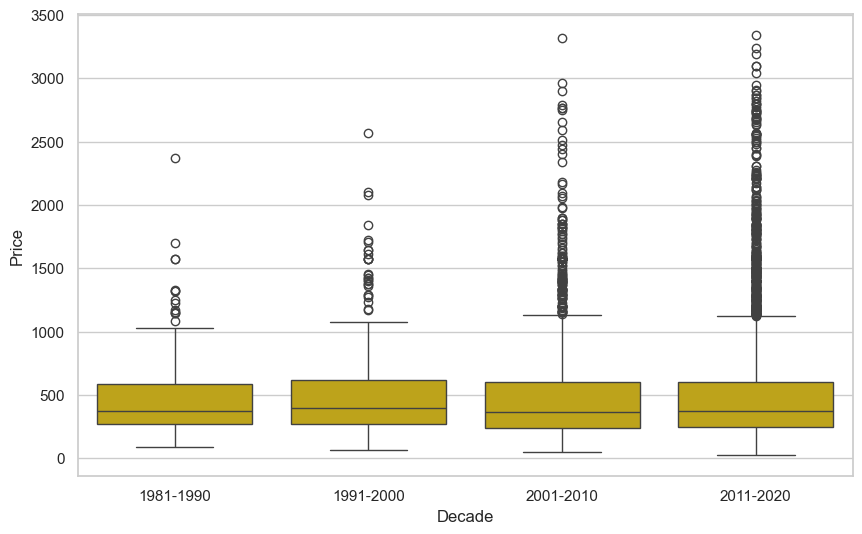

In [2172]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year_bucket', y='PriceCap',color='#d8b600', data=BoxPlotData,whis=1.5)

# sns.lineplot(x='year_bucket', y='Price', data=BoxPlotData, ci='sd', marker='o')


# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Price')

In [2173]:
# for i in columns:
#     ReadyforModel_v6= OutLierHandling(ReadyforModel_v7,'Year_Category_AveragePrice')

# Step 5 : Cleaning and Pre Modeling Steps and Modeling (Again)

In [2174]:
ReadyforModel_v10= ReadyforModel_v8

PostFeatEngineer_Stats=CalBasicStats(ReadyforModel_v10,'numeric')
PostFeatEngineer_Stats

,ColumnName,AllCounts,NotNullCounts,UniqueCounts,%Zero,%Missing,Min,Max,Mean,Average,Median,StddDev,Var,Skewness,Kurtosis,25Percentile,50Percentile,75Percentile
0,Price,5611,5611,1564,0.000000,0.000000,25.000000,14100.000000,562.715088,562.715088,374.000000,700.222992,4.903122e+05,6.903592,83.396952,248.000000,374.000000,600.875000
0,PriceTransformed,5611,5611,1564,0.000000,0.000000,3.218876,9.553930,5.987712,5.987712,5.924256,0.775790,6.018501e-01,0.380524,0.961344,5.513429,5.924256,6.398387
0,_NoOfReviews,5611,5611,99,0.000000,0.000000,1.000000,99.000000,13.838531,13.838531,6.000000,18.675066,3.487581e+02,2.257188,5.167026,2.000000,6.000000,17.000000
0,Year,5611,5590,56,0.000000,0.374265,1900.000000,2019.000000,2011.854383,NaN,2014.000000,7.900131,6.241207e+01,-3.056365,20.382134,2010.000000,2014.000000,2017.000000
0,Author_Min_OnlineReviews,5611,5611,96,0.000000,0.000000,1.000000,99.000000,9.053645,9.053645,3.000000,14.552205,2.117667e+02,3.094797,11.020119,1.000000,3.000000,10.000000
0,Author_Avg_OnlineReviews,5611,5611,307,0.000000,0.000000,1.000000,99.000000,13.831513,13.831513,7.903226,16.130291,2.601863e+02,2.092185,5.101202,3.000000,7.903226,19.909091
0,Author_max_OnlineReviews,5611,5611,98,0.000000,0.000000,1.000000,99.000000,23.322581,23.322581,11.000000,27.337010,7.473121e+02,1.417128,0.921222,3.000000,11.000000,33.000000
0,BookCategory_Min_Price,5611,5611,9,0.000000,0.000000,25.000000,94.840000,52.237926,52.237926,50.000000,21.653239,4.688627e+02,0.348533,-0.947321,30.000000,50.000000,68.000000
0,BookCategory_Avg_Price,5611,5611,11,0.000000,0.000000,324.876318,975.719126,563.617710,563.617710,450.608989,217.382455,4.725513e+04,0.496960,-1.166217,359.795581,450.608989,754.639244
0,BookCategory_max_Price,5611,5611,11,0.000000,0.000000,2442.000000,14100.000000,6882.680328,6882.680328,5177.660000,4018.108914,1.614520e+07,0.578776,-1.095108,3098.000000,5177.660000,9984.000000


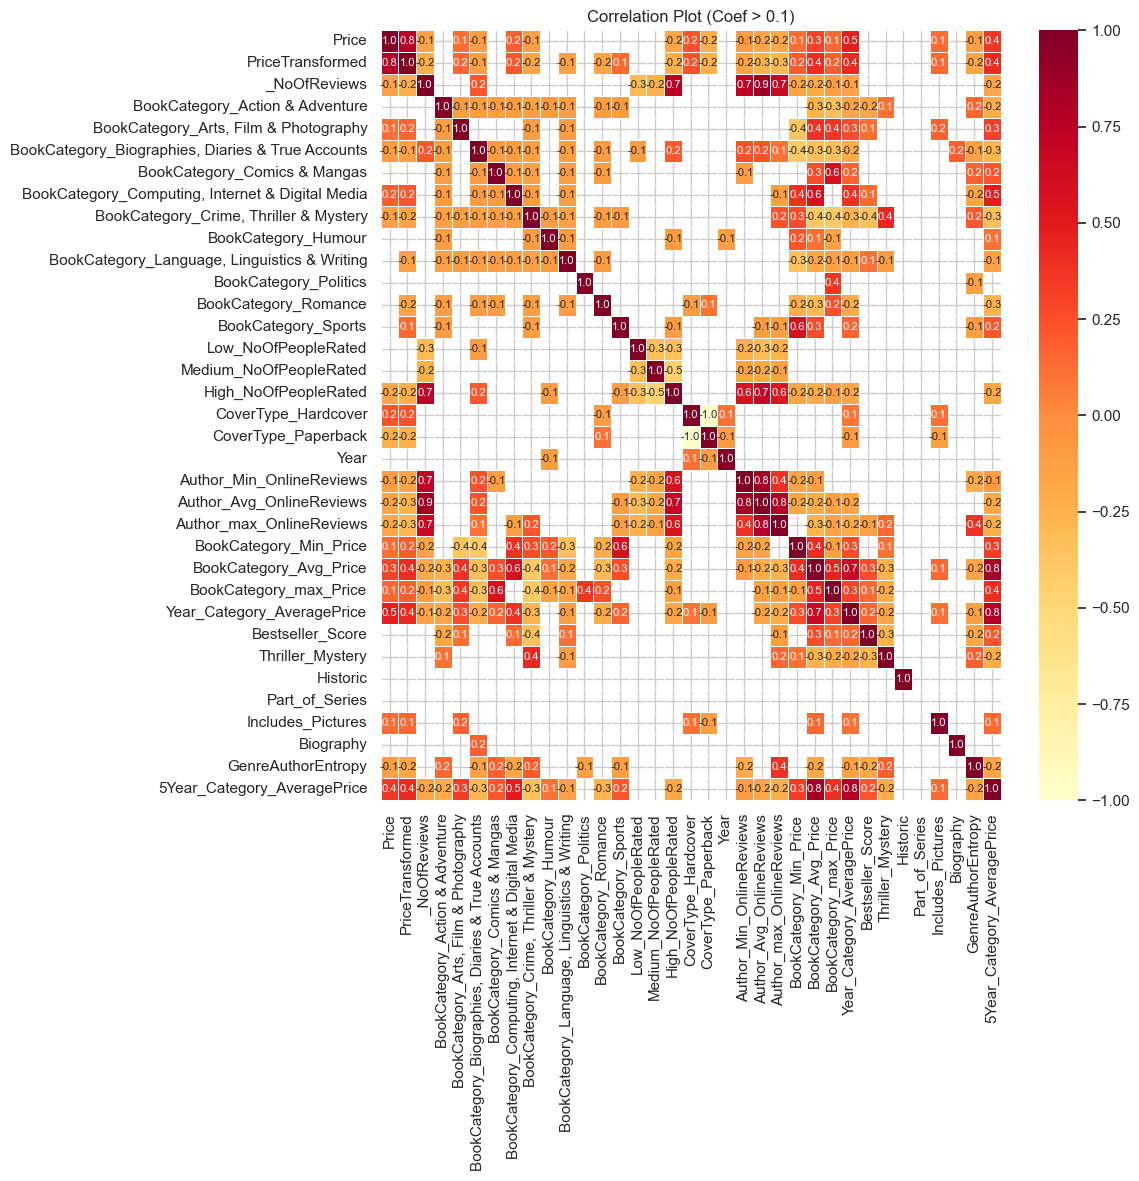

In [2175]:
def plot_correlation_matrix_threshhold(data, size=(8, 6), cmap='YlOrRd', threshold=0.10, annot_fontsize=8):
    correlation_matrix = data.corr()
    
    # Filter the correlation matrix based on the threshold
    high_correlation_matrix = correlation_matrix[abs(correlation_matrix) > threshold]
    
    # Create a seaborn heatmap with dynamic sizing and yellowish color
    plt.figure(figsize=size)
    sns.heatmap(high_correlation_matrix, annot=True, cmap=cmap, fmt=".1f", linewidths=.5,
                annot_kws={"size": annot_fontsize})
    
    plt.title(f'Correlation Plot (Coef > {threshold})')
    plt.show()
plot_correlation_matrix_threshhold(ReadyforModel_v10,(10,10))

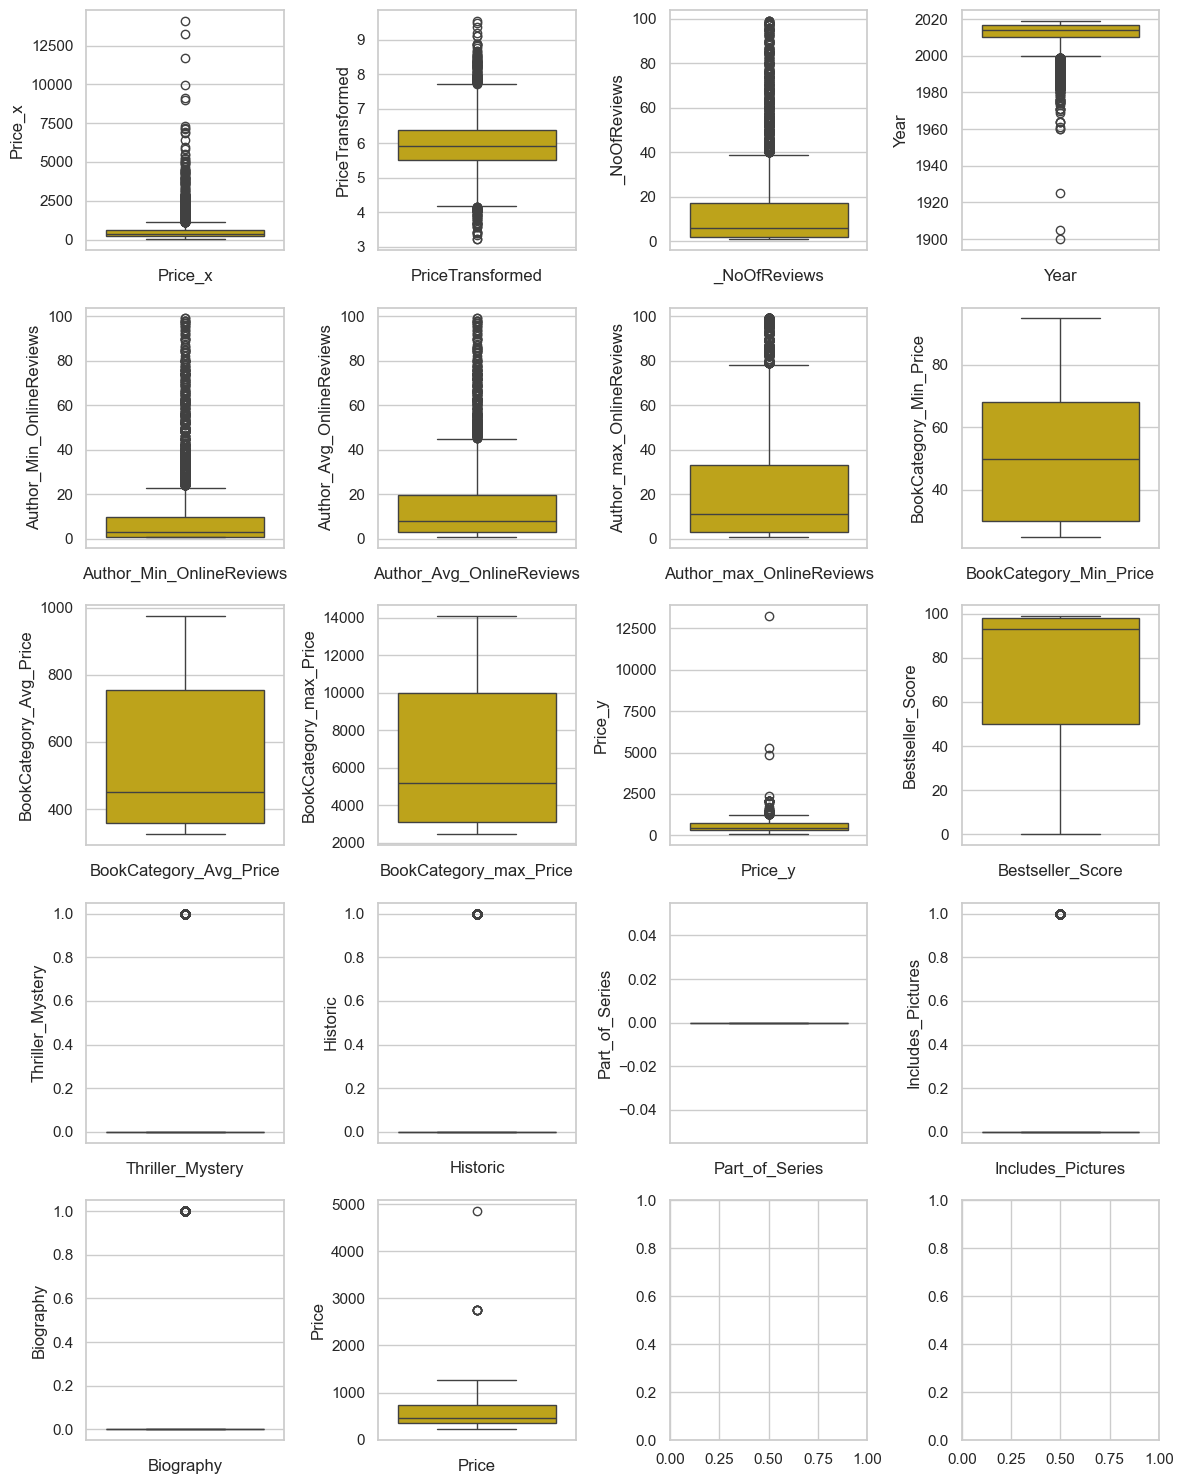

In [2013]:
Cols_numeric=PostFeatEngineer_Stats['ColumnName'].unique()
CustomPlots(ReadyforModel_v8[Cols_numeric],'box')

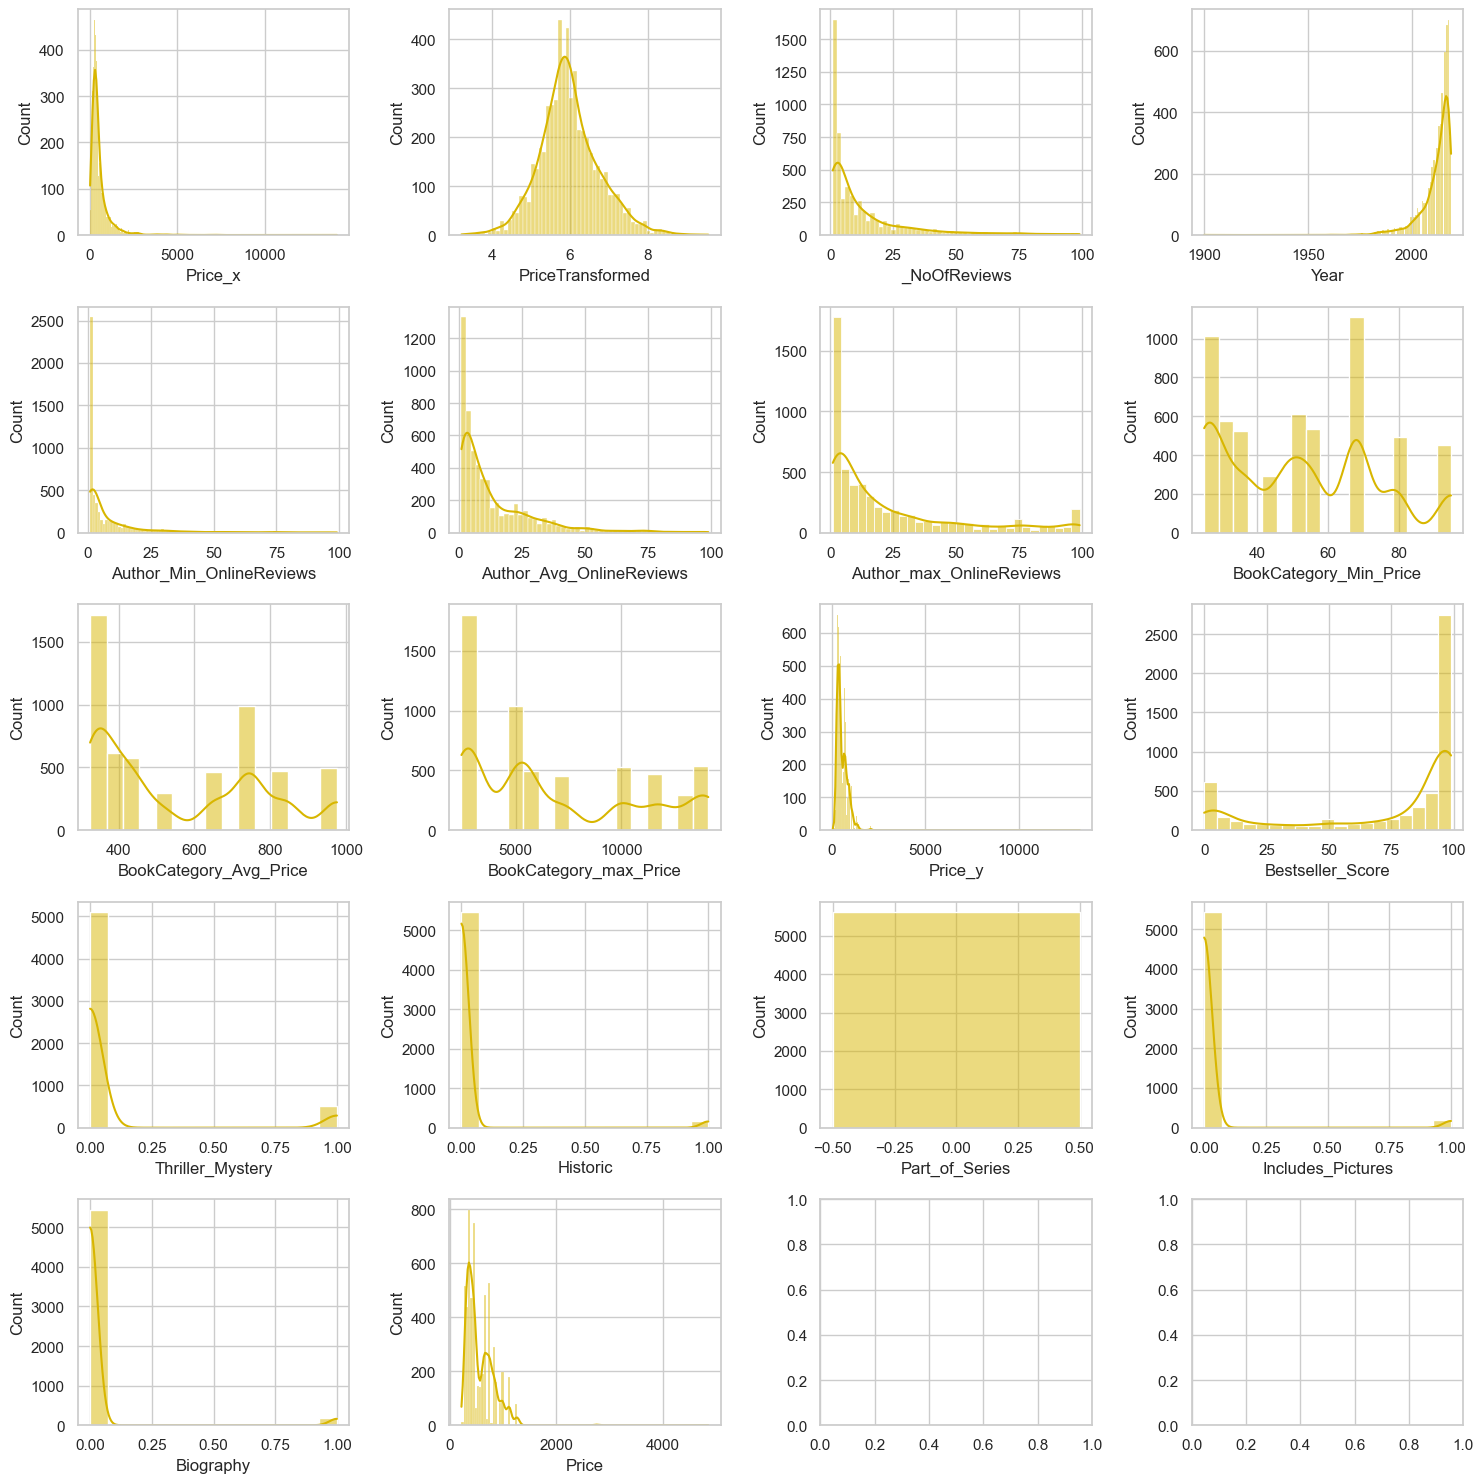

In [2014]:
Cols_numeric=PostFeatEngineer_Stats['ColumnName'].unique()
CustomPlots(ReadyforModel_v8[Cols_numeric],'hist')

In [2176]:
ReadyforModel_v8.dtypes

Price                                                 float64
PriceTransformed                                      float64
Rating                                                 object
_NoOfReviews                                            int64
Rating_Outof5                                          object
BookCategory_Action & Adventure                         uint8
BookCategory_Arts, Film & Photography                   uint8
BookCategory_Biographies, Diaries & True Accounts       uint8
BookCategory_Comics & Mangas                            uint8
BookCategory_Computing, Internet & Digital Media        uint8
BookCategory_Crime, Thriller & Mystery                  uint8
BookCategory_Humour                                     uint8
BookCategory_Language, Linguistics & Writing            uint8
BookCategory_Politics                                   uint8
BookCategory_Romance                                    uint8
BookCategory_Sports                                     uint8
Low_NoOf

In [2177]:
# Outlier handling 

columns=[
'Author_Min_OnlineReviews',                               
'Author_Avg_OnlineReviews',                       
'Author_max_OnlineReviews',
'Year_Category_AveragePrice',
'_NoOfReviews',
]

for i in columns:
    ReadyforModel_v10= OutLierHandling(ReadyforModel_v10,i)

# Dtree Bivariate 

In [2145]:
def RangeCalc(min,max):
    if min==max:
            return min
    if np.isnan(min) ==True or np.isnan(max) ==True :
            return 'Missing'  
    else:
            min = float(min)
            max = float(max)
            suffixes = ['', 'K', 'M']
            magnitude_min = 0
            magnitude_max = 0
            while abs(min) >= 1000 and magnitude_min < len(suffixes)-1:
                min /= 1000
                magnitude_min += 1
            while abs(max) >= 1000 and magnitude_max < len(suffixes)-1:
                max /= 1000
                magnitude_max += 1
            min = '{:.1f}{}'.format(min, suffixes[magnitude_min])
            max = '{:.1f}{}'.format(max, suffixes[magnitude_max])
            min=str(min)
            max=str(max)
            return min +' to ' + max

def DtreeCreator(Sourcedf,var1,Target,debth=2,M='Classifier'):

    TreeDf=pd.DataFrame()
    TreeDf_NA_P=pd.DataFrame()

    #Prepping the data For Dtree
    EDA_df=Sourcedf
    TreeDf=EDA_df[[var1,Target]]
    TreeDf_NA_P=EDA_df[[var1,Target]]
    TreeDf_NA=TreeDf_NA_P[TreeDf_NA_P[var1].isna()]
    TreeDf=TreeDf.dropna()
    TreeDf.rename(columns = {var1:'X',Target:'Y'}, inplace = True)
    TreeDf_NA.rename(columns = {var1:'X',Target:'Y'}, inplace = True)



    # Split the data into independent variables (X) and the target variable (y)
    X = TreeDf[['X']]
    y = TreeDf['Y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create the decision tree regressor
    if M=='Regressor':
        model = DecisionTreeRegressor(max_depth=debth, ccp_alpha=0.0, max_features=None)
        model.fit(X_train, y_train)
        
    # Predict the target variable for the test data

    if M=='Regressor':
        y_pred = model.predict(X_test)
        TreeDf['Pred']= model.predict(TreeDf[['X']])
    else :
        y_pred = model.predict(X_test)
        TreeDf['Pred']= model.predict_proba(TreeDf[['X']])[:, 1]


    #Creating the Final result and bucket 

    Pred_Unique=TreeDf["Pred"].unique()
    newdf=pd.DataFrame()
    newdfnewdf2=pd.DataFrame()
    Resultdf=pd.DataFrame()


    for i in Pred_Unique:
        newdf['Pred']=[i]
        newdf['VariableName']=var1
        newdf['X_min']=np.amin(TreeDf["X"][TreeDf["Pred"]==i])
        newdf['X_max']=np.amax(TreeDf["X"][TreeDf["Pred"]==i])
        newdf['Counts']=np.size(TreeDf["X"][TreeDf["Pred"]==i])
        newdf['Counts%']=round(((np.size(TreeDf["X"][TreeDf["Pred"]==i])/len(EDA_df))*100),1)
        Resultdf=pd.concat((Resultdf, newdf), axis = 0)

    # TreeDf=TreeDf.dropna()

    newdf['Pred']=np.mean(TreeDf_NA["Y"])
    newdf['VariableName']=var1
    newdf['X_min']=np.amin(TreeDf_NA["X"])
    newdf['X_max']=np.amax(TreeDf_NA["X"])
    newdf['Counts']=np.size(TreeDf_NA["X"])
    newdf['Counts%']=round(((np.size(TreeDf_NA["X"])/len(EDA_df))*100),1)


    Resultdf=pd.concat((Resultdf, newdf), axis = 0)

    Resultdf = Resultdf[Resultdf['Counts%']>2]

    #Post processing and Close 

    Resultdf["X_min"]=Resultdf["X_min"].round(2)
    Resultdf["X_max"]=Resultdf["X_max"].round(2)
    Resultdf=Resultdf.sort_values("X_min")
    Resultdf["Pred"]=Resultdf["Pred"].round(2)
    Resultdf["Counts%"]=Resultdf["Counts%"].astype(str) + '% obs'
    # Resultdf["Pred"]= Resultdf['Pred'].apply(lambda x: '0' if x== 0.0 else x)

    Resultdf['Range'] = Resultdf.apply(lambda row: RangeCalc(row['X_min'], row['X_max']), axis=1)
    return Resultdf,model
def PlotDtreeGraph2(data,Prefix=''):

    Resultdf=data 
    Maxy=data['Pred'].max()+0.20
    
    # create a Dictionary for Order Calculation 
    order=[]
    for i in range(0, len(Resultdf)):
        order.append(i)

    # XOrder=data['Range'].tolist()
    Title=data['VariableName'].iloc[0] + ' ' + Prefix
    # Title=Prefix
    print(Title)

    bar_plot = alt.Chart(Resultdf).mark_bar(color='#ffd966',stroke='black').encode(
        x=alt.X('Range',axis=alt.Axis(labelAngle=0),sort=alt.EncodingSortField(field='yield', order='descending')),
        y=alt.Y('Pred',title='Price'),
        tooltip=['Range','Pred','Counts'],
    )
    pred_labels = bar_plot.mark_text(
        align='center',
        baseline='bottom',
        dy=-5,  # Offset the text labels slightly above the bars
    ).encode(
        text='Pred'
    )
    count_label = bar_plot.mark_text(
        align='center',
        baseline='bottom',
        color='#000000',
        dy=25,  # Offset the text labels slightly above the bars
    ).encode(
        text='Counts%'
       
    )
    chart = (bar_plot + pred_labels +count_label).properties(width=650, height=300)

    # Adjust the range of the y-axis to zoom out the bars
    chart = chart.configure_axis(
        grid=False).encode(y=alt.Y('Pred', scale=alt.Scale(domain=(0, Maxy))))

    chart = chart.properties(title=Title)
    return display(chart)



In [2160]:
resultdf,model=DtreeCreator(ReadyforModel_v10,'_NoOfReviews','Price',debth=2,M='Regressor')
PlotDtreeGraph2(resultdf)

_NoOfReviews 


alt.LayerChart(...)

In [2201]:
# Exporting The Tree

# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import graphviz

# dot_data = export_graphviz(model, out_file=None,
#                         #    feature_names=X.columns,
#                         #    class_names='Price',
#                            filled=True, rounded=True,
#                            special_characters=True)


# graph = graphviz.Source(dot_data)
# # Save the decision tree visualization as an image
# graph.render('decision_tree_sample1')

In [2202]:
# CustomPlots(ReadyforModel_v10[columns],'hist')

In [2178]:
ReadyforModel_v10.dtypes

Price                                                 float64
PriceTransformed                                      float64
Rating                                                 object
_NoOfReviews                                          float64
Rating_Outof5                                          object
BookCategory_Action & Adventure                         uint8
BookCategory_Arts, Film & Photography                   uint8
BookCategory_Biographies, Diaries & True Accounts       uint8
BookCategory_Comics & Mangas                            uint8
BookCategory_Computing, Internet & Digital Media        uint8
BookCategory_Crime, Thriller & Mystery                  uint8
BookCategory_Humour                                     uint8
BookCategory_Language, Linguistics & Writing            uint8
BookCategory_Politics                                   uint8
BookCategory_Romance                                    uint8
BookCategory_Sports                                     uint8
Low_NoOf

In [2179]:
# Feature Selected from Multiple Correlation Techniques 

print('Total No of Features' ,len(ReadyforModel_v10.columns))
Selected_list,Selected= CorrAttributesList(ReadyforModel_v10,'Price',0.10)

print('Pre Multicolinear check Selected Features' ,len(Selected_list))

# remove Highly Correalted Features 

ReadyforModel_v10= remove_highly_correlated_features(ReadyforModel_v10[Selected_list],0.90)
Selected_list=ReadyforModel_v10.columns

print('Post Multicolinear check Selected Features' ,len(Selected_list))

print(Selected_list)

Total No of Features 38
Pre Multicolinear check Selected Features 27
['CoverType_Paperback']
Post Multicolinear check Selected Features 26
Index(['Price', 'PriceTransformed', '_NoOfReviews',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Romance',
       'BookCategory_Sports', 'Low_NoOfPeopleRated', 'High_NoOfPeopleRated',
       'CoverType_Hardcover', 'Author_Min_OnlineReviews',
       'Author_Avg_OnlineReviews', 'Author_max_OnlineReviews',
       'BookCategory_Min_Price', 'BookCategory_Avg_Price',
       'BookCategory_max_Price', 'Year_Category_AveragePrice',
       'Bestseller_Score', 'Thriller_Mystery', 'Includes_Pictures',
       'GenreAuthorEntropy', '5Year_Category_AveragePrice'],
      dtype='object')


In [2203]:
Selected['column']=Selected.index
Selected= Selected[['column','AbsPearson','AbsSpearman','Spearman']].sort_values(by=(['AbsSpearman']),ascending=False).reset_index()

Selected = Selected[Selected['column'] != 'Price']
Selected = Selected[Selected['column'] != 'PriceTransformed']


In [2206]:
import altair as alt

chart = alt.Chart(Selected).mark_bar().encode(
    x=alt.X('AbsSpearman:Q'),
    y=alt.Y('column:N',sort='-x',axis=alt.Axis(labelLimit=800)), 
    color=alt.value('#ffd966'),
    tooltip=['AbsPearson']
).properties(
    width=500,
    height=700,
    title='Absolute Spearman Correlation Values'
)

chart = chart.configure_axisY(
        title=None  # Set title to None to hide the y-axis label
    ).configure_mark(
        strokeWidth=0.3,  # Set the width of the border
        stroke='black'  # Set the color of the border
    ).configure_view(
    fill='#ffffe0'  # Set the background color to light yellow
)

# Show the Altair chart
chart

alt.Chart(...)

In [2207]:
chartDtree = alt.Chart(Selected).mark_bar().encode(
        x=alt.X('Importance'),
        y=alt.Y('Feature', sort='-x',axis=alt.Axis(labelLimit=800)),
        # color=alt.Color('Importance', scale=alt.Scale(color=custom_colors)),
        color=alt.value('#ffd966'),
        tooltip=['Feature','Importance']
    ).properties(
        title=Title,
        width=500,
        height=500)

chartDtree = chartDtree.configure_axisY(
        title=None  # Set title to None to hide the y-axis label
    ).configure_mark(
        strokeWidth=0.3,  # Set the width of the border
        stroke='black'  # Set the color of the border
    )

In [2208]:
Selected_list

Index(['Price', 'PriceTransformed', '_NoOfReviews',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Romance',
       'BookCategory_Sports', 'Low_NoOfPeopleRated', 'High_NoOfPeopleRated',
       'CoverType_Hardcover', 'Author_Min_OnlineReviews',
       'Author_Avg_OnlineReviews', 'Author_max_OnlineReviews',
       'BookCategory_Min_Price', 'BookCategory_Avg_Price',
       'BookCategory_max_Price', 'Year_Category_AveragePrice',
       'Bestseller_Score', 'Thriller_Mystery', 'Includes_Pictures',
       'GenreAuthorEntropy', '5Year_Category_AveragePrice'],
      dtype='object')

In [2209]:
Targets=['PriceTransformed','Price','Year_Category_AveragePrice']
FeatureList= [x for x in Selected_list if x not in Targets]


ReadyforModel_v10=ReadyforModel_v10.dropna()
print(FeatureList)
models,x_test,y_test = CreateML_Model(ReadyforModel_v10,Targets[0],FeatureList)

# Feature Importance based on the Models 

Model=models['RandomForestRegressor']


['_NoOfReviews', 'BookCategory_Arts, Film & Photography', 'BookCategory_Biographies, Diaries & True Accounts', 'BookCategory_Comics & Mangas', 'BookCategory_Computing, Internet & Digital Media', 'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Language, Linguistics & Writing', 'BookCategory_Romance', 'BookCategory_Sports', 'Low_NoOfPeopleRated', 'High_NoOfPeopleRated', 'CoverType_Hardcover', 'Author_Min_OnlineReviews', 'Author_Avg_OnlineReviews', 'Author_max_OnlineReviews', 'BookCategory_Min_Price', 'BookCategory_Avg_Price', 'BookCategory_max_Price', 'Bestseller_Score', 'Thriller_Mystery', 'Includes_Pictures', 'GenreAuthorEntropy', '5Year_Category_AveragePrice']
ModelName: MeanAbsoluteError, RSquare ,AdjRSquare
Lasso : 0.557298 ,0.223687 ,0.207261
ElasticNet : 0.558301 ,0.225671 ,0.209287
DecisionTreeRegressor : 0.640345 ,-0.341006 ,-0.369381
KNeighborsRegressor : 0.583438 ,0.133232 ,0.114892
RandomForestRegressor : 0.538928 ,0.250503 ,0.234644
ExtraTreesRegressor : 0.566563 ,0.

In [2210]:
Title= 'RandomForestRegressor - Post feature Engineering'
PlotFeatureImporance(Model,Title)

alt.Chart(...)

# V2 : Kaggle Score 

In [2211]:
import numpy as np

#Step 10 : 
Model.fit(x_test, y_test)

actual = y_test
predicted = Model.predict(x_test)

actual_real=np.exp(actual)
predicted_real=np.exp(predicted)

# Example usage:
# Assuming 'y_actual' is your actual target values and 'y_predicted' is your model's predicted values
rmsle_error = rmsle(actual, predicted)

Score = 1 - rmsle_error
print(f'RMSLE Error on Log: {rmsle_error}')
print(f'Score on Log: {Score}')

rmsle_error = rmsle(actual_real, predicted_real)

Score = 1 - rmsle_error
print(f'RMSLE Error: {rmsle_error}')
print(f'Score: {Score}')

RMSLE Error on Log: 0.04373260333185703
Score on Log: 0.956267396668143
RMSLE Error: 0.2729187941963575
Score: 0.7270812058036424


# Step 5 : Model Performance details

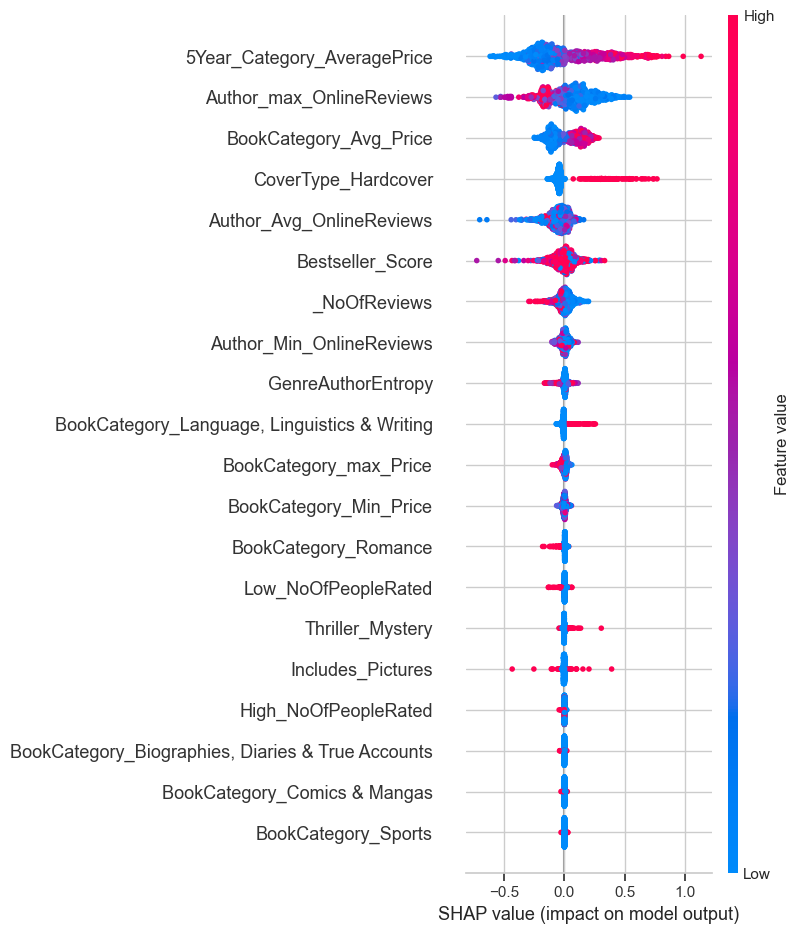

In [2212]:
# Explainer using Shapley 

# # for Linear reeg 
# Model.fit(x_test, y_test)
# explainer = shap.LinearExplainer(Model, x_test)
# shap_values = explainer.shap_values(x_test)
# shap.summary_plot(shap_values,x_test)


# for Random forest 

explainer = shap.Explainer(Model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)


# shap.summary_plot(shap_values, test_data)


In [2213]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, learning_curve

In [2117]:
# Cross Validation , 5 fold 

X=ReadyforModel_v10[FeatureList]
Y=ReadyforModel_v10[Targets].astype(int)
cv_scores = cross_val_score(Model, X, Y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores (Negative Mean Squared Error):", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


# Cross-Validation Scores (Negative Mean Squared Error): [-0.34241904 -0.3648708  -0.38507947 -0.40520201 -0.41606111]
# Mean CV Score: -0.38272648345058435

Cross-Validation Scores (Negative Mean Squared Error): [-113533.19295816  -96651.76410881 -203271.04651364 -161994.56330657
 -139792.53635969]
Mean CV Score: -143048.62064937467


# Viz For Explanability

In [2214]:
results_df = pd.DataFrame({'Actual': actual_real, 'Predicted': predicted_real})
AllInput = x_test
AllInput=pd.merge(AllInput,results_df,left_index=True, right_index=True)
AllInput['Gap']=AllInput['Actual']-AllInput['Predicted']

AllInput.columns

Index(['_NoOfReviews', 'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Romance',
       'BookCategory_Sports', 'Low_NoOfPeopleRated', 'High_NoOfPeopleRated',
       'CoverType_Hardcover', 'Author_Min_OnlineReviews',
       'Author_Avg_OnlineReviews', 'Author_max_OnlineReviews',
       'BookCategory_Min_Price', 'BookCategory_Avg_Price',
       'BookCategory_max_Price', 'Bestseller_Score', 'Thriller_Mystery',
       'Includes_Pictures', 'GenreAuthorEntropy',
       '5Year_Category_AveragePrice', 'Actual', 'Predicted', 'Gap'],
      dtype='object')

In [2215]:
# 'Price', 'PriceTransformed', '_NoOfReviews',
#        'BookCategory_Arts, Film & Photography',
#        'BookCategory_Biographies, Diaries & True Accounts',
#        'BookCategory_Comics & Mangas',
#        'BookCategory_Computing, Internet & Digital Media',
#        'BookCategory_Crime, Thriller & Mystery',
#        'BookCategory_Language, Linguistics & Writing', 'BookCategory_Romance',
#        'BookCategory_Sports', 'Low_NoOfPeopleRated', 'CoverType_Hardcover',
#        'Author_Min_OnlineReviews', 'Author_max_OnlineReviews',
#        'BookCategory_Min_Price', 'BookCategory_Avg_Price',
#        'BookCategory_max_Price', 'Year_Category_AveragePrice',
#        'Bestseller_Score', 'Thriller_Mystery', 'Includes_Pictures',
#        'GenreEntropy', '5Year_Category_AveragePrice'

resultdf,model=DtreeCreator(ReadyforModel_v10,'5Year_Category_AveragePrice','Price',debth=2,M='Regressor')
PlotDtreeGraph2(resultdf)

5Year_Category_AveragePrice 


alt.LayerChart(...)

In [2147]:
resultdf,model=DtreeCreator(ReadyforModel_v10,'Bestseller_Score','Price',debth=2,M='Regressor')
PlotDtreeGraph2(resultdf)

Bestseller_Score 


alt.LayerChart(...)

In [1706]:
# K Fold Cross v , Every Fold I get Score , Plot Variance is low , 

In [1909]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [1961]:
df=pd.DataFrame()
df['Synopsis']=SourceData['Synopsis']

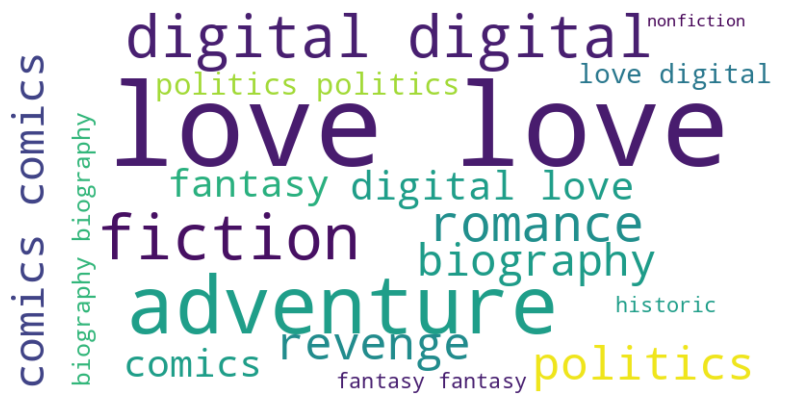

In [1964]:
text_data = ' '.join(df['Synopsis'])

# List of specific words you want to include in the word cloud
specific_words = ['adventure', 'love', 'revenge', 'fantasy','biography','Adventure','mystery'
                  'series','digital','politics','fiction','comics','nonfiction','romance','romance','historic']
# Filter text to include only specific words
filtered_text_data = ' '.join([word for word in text_data.split() if word.lower() in specific_words])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()